Step 1: Load the Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the training data
train_df = pd.read_csv('data/train.csv')

#load the test data
test_df = pd.read_csv('data/test.csv')

In [3]:
#display the first few rows of the training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Exploratory Data Analysis (EDA)

In [4]:
#1. check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#2.summary statistics (numerical features in the dataset)
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#3.data types and info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


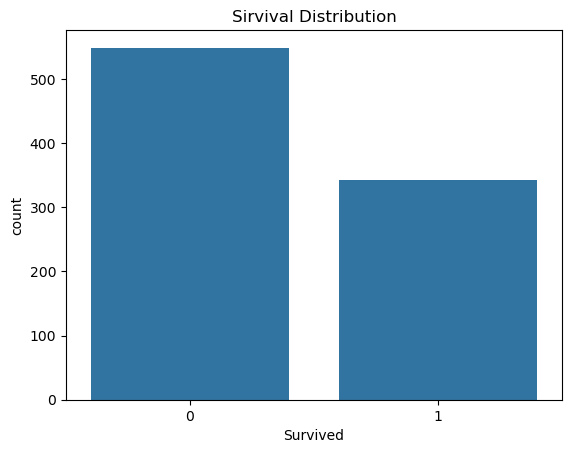

In [7]:
#4.visualize the target variable (survival rate) - look how the target variable is distributed
sns.countplot(x='Survived', data = train_df)
plt.title('Sirvival Distribution')
plt.show()


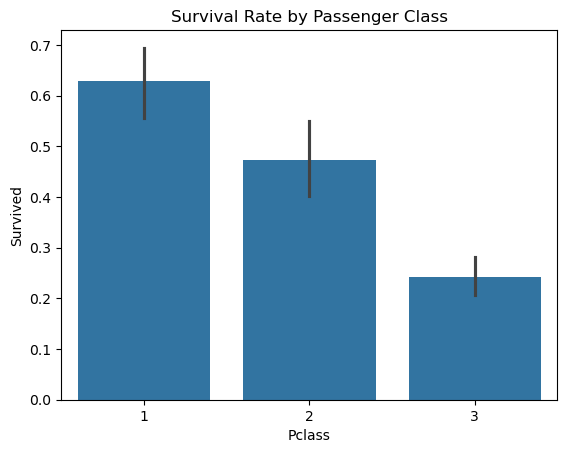

In [8]:
#5.explore relationships (between different features and the target variable)
#for instance, how does passenger class (`Pclass`) affect survival?
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

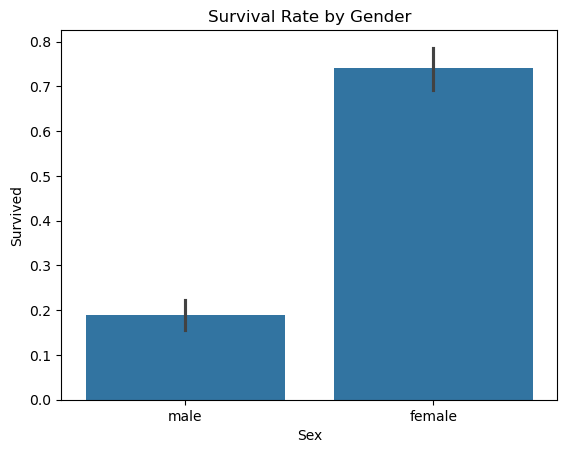

In [9]:
#for instance, survival rate based on gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

Step 3: Data Cleaning

In [10]:
#1.Handle missing values (fill or drop
#fill missing age values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

#drop rows with missing 'Embarked' values
train_df.dropna(subset=['Embarked'], inplace=True)

In [11]:
#2.feature engineering (create new feature: extracting titles and creating a family size feature)
#extract title from the name column
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

#create a Family Size feature
train_df['Family Size'] = train_df['SibSp'] + train_df['Parch'] + 1

Step 4: Prepare for Modeling

In [12]:
#1.convert categorical variables (into numerical values using one-hot encoding)
#example of one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [16]:
#2.define features and target variables
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

In [17]:
#3.split data into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

Step 5: Start Building Models (simple models like Logistic regression first and more complicated models next)

In [29]:
#4import required packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

model = LogisticRegression(max_iter=400, verbose=1) #activate verbose to print out iteration information
model.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92828D+02    |proj g|=  3.60300D+04

At iterate   50    f=  3.32140D+02    |proj g|=  2.77257D+02

At iterate  100    f=  3.08875D+02    |proj g|=  7.87563D+01

At iterate  150    f=  2.99374D+02    |proj g|=  3.46919D+02

At iterate  200    f=  2.97632D+02    |proj g|=  8.72494D+01

At iterate  250    f=  2.95394D+02    |proj g|=  2.71926D+01

At iterate  300    f=  2.95090D+02    |proj g|=  2.41589D+02

At iterate  350    f=  2.94270D+02    |proj g|=  1.22725D+02

At iterate  400    f=  2.93997D+02    |proj g|=  3.25572D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
/opt/anaconda3/envs/titanic_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, verbose=1)

Since increasing max_iter to 400 does not help the model to converge, it is time to scale features!

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [27]:
model = LogisticRegression(max_iter=400, verbose=1)
model.fit(X_train_scaled, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           27     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92828D+02    |proj g|=  1.88152D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   27     38     41      1     0     0   1.734D-03   2.845D+02
  F =   284.47098440361123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


LogisticRegression(max_iter=400, verbose=1)

In [31]:
#5.predict on the validation set
y_pred = model.predict(X_val_scaled)
print(f'Accuracy: {accuracy_score(y_val,y_pred)}')
print(classification_report(y_val,y_pred))
print(f'ROC AUC Score: {roc_auc_score(y_val, y_pred)}')

Accuracy: 0.6404494382022472
              precision    recall  f1-score   support

           0       0.91      0.46      0.61       109
           1       0.52      0.93      0.67        69

    accuracy                           0.64       178
   macro avg       0.71      0.69      0.64       178
weighted avg       0.76      0.64      0.63       178

ROC AUC Score: 0.6931259141071666


/opt/anaconda3/envs/titanic_env/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The accuracy of the model is too low and is doing slightly better than the baseline accuracy which is 61-62%, because around 61% of passengers survived. So our logistic regression model is doing great!
So we can introduce more feature engineering, try different models such as Random Forrest or Gradient Boosting, do cross validation, etc.
Let's try feature engineering: